<a href="https://colab.research.google.com/github/MateusCDev/Python_DIO/blob/master/Pandas_Aula2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Trabalhando com Planilhas do Excel - Mateus Cesar

In [2]:
#importando a biblioteca
import pandas as pd

In [3]:
#Leitura dos arquivos
df1 = pd.read_excel("/content/drive/MyDrive/datasets/Aracaju.xlsx")
df2 = pd.read_excel("/content/drive/MyDrive/datasets/Fortaleza.xlsx")
df3 = pd.read_excel("/content/drive/MyDrive/datasets/Natal.xlsx")
df4 = pd.read_excel("/content/drive/MyDrive/datasets/Recife.xlsx")
df5 = pd.read_excel("/content/drive/MyDrive/datasets/Salvador.xlsx")

In [4]:
#juntando todos os arquivos
df = pd.concat([df1,df2,df3,df4,df5])

In [4]:
#Exibindo as 5 primeiras linhas
df.head()

,Cidade,Data,Vendas,LojaID,Qtde
0,Aracaju,2018-01-01,142.00,1520,1
1,Aracaju,2018-01-01,14.21,1522,6
2,Aracaju,2018-01-01,71.55,1520,1
3,Aracaju,2018-01-01,3.01,1521,7
4,Aracaju,2018-01-01,24.51,1522,8


In [5]:
#Exibindo as 5 ultimas linhas
df.tail()

,Cidade,Data,Vendas,LojaID,Qtde
235,Salvador,2019-01-03,41.84,1034,1
236,Salvador,2019-01-03,126.29,1035,3
237,Salvador,2019-01-03,38.06,1036,3
238,Salvador,2019-01-03,139.64,1035,1
239,Salvador,2019-01-03,161.41,1037,3


In [9]:
#Verificando o tipo de dado de cada coluna
df.dtypes

Cidade            object
Data      datetime64[ns]
Vendas           float64
LojaID            object
Qtde               int64
dtype: object

In [7]:
#Amostra do conjunto de dados
df.sample(5)

,Cidade,Data,Vendas,LojaID,Qtde
113,Recife,2019-03-02,38.63,980,2
9,Aracaju,2019-01-01,149.36,1523,3
60,Aracaju,2018-01-01,215.88,1521,3
102,Fortaleza,2019-01-01,13.99,1004,3
12,Salvador,2019-01-01,125.05,1034,3


In [8]:
#Alterando o tipo de dado da coluna lojaID
df["LojaID"] = df["LojaID"].astype("object")

In [10]:
#Consultando linhas com valores nulos
df.isnull().sum()

Cidade    0
Data      0
Vendas    0
LojaID    0
Qtde      0
dtype: int64

In [12]:
#Substituindo os valores nulos pela media de vendas
df["Vendas"].fillna(df["Vendas"].mean(), inplace =True)

In [14]:
df.isnull().sum()

Cidade    0
Data      0
Vendas    0
LojaID    0
Qtde      0
dtype: int64

In [15]:
#Substituindo os valores nulos por zero
df["Vendas"].fillna(0, inplace = True)

In [16]:
#Apagando as linhas com valores nulos
df.dropna(inplace =True)

In [17]:
#Apagando as linhas com valores nulos com base apenas em 1 coluna
df.dropna(subset=["Vendas"], inplace = True)

In [18]:
#Removendo linhas que estejam com valores faltantes em todas as colunas
df.dropna(how="all", inplace =True)

Criando colunas novas

In [6]:
#Criando coluna de receita
df["Receita"] = df["Vendas"].mul(df["Qtde"])

In [20]:
df.head()

,Cidade,Data,Vendas,LojaID,Qtde,Receita
0,Aracaju,2018-01-01,142.00,1520,1,142.00
1,Aracaju,2018-01-01,14.21,1522,6,85.26
2,Aracaju,2018-01-01,71.55,1520,1,71.55
3,Aracaju,2018-01-01,3.01,1521,7,21.07
4,Aracaju,2018-01-01,24.51,1522,8,196.08


In [7]:
#Criando coluna Receita/Vendas
df["Receita/Vendas"] = df["Receita"] / df["Vendas"]
df.head()

,Cidade,Data,Vendas,LojaID,Qtde,Receita,Receita/Vendas
0,Aracaju,2018-01-01,142.00,1520,1,142.00,1.0
1,Aracaju,2018-01-01,14.21,1522,6,85.26,6.0
2,Aracaju,2018-01-01,71.55,1520,1,71.55,1.0
3,Aracaju,2018-01-01,3.01,1521,7,21.07,7.0
4,Aracaju,2018-01-01,24.51,1522,8,196.08,8.0


In [22]:
#Retornando a maior receita
df["Receita"].max()

3544.0

In [23]:
#Retornando a menor receita
df["Receita"].min()

3.34

In [24]:
#nlargest retornando as 3 linhas com maiores receitas
df.nlargest(3,"Receita")

,Cidade,Data,Vendas,LojaID,Qtde,Receita,Receita/Vendas
7,Natal,2019-03-18,886.0,853,4,3544.0,4.0
51,Natal,2018-01-21,859.0,852,4,3436.0,4.0
55,Natal,2019-01-08,859.0,854,4,3436.0,4.0


In [26]:
#nsmallest retornando as 3 linhas com menores receitas
df.nsmallest(3, "Receita")

,Cidade,Data,Vendas,LojaID,Qtde,Receita,Receita/Vendas
118,Aracaju,2018-01-01,3.34,1522,1,3.34,1.0
65,Recife,2019-01-01,4.01,981,1,4.01,1.0
92,Natal,2019-01-02,4.57,1035,1,4.57,1.0


In [27]:
#Agrupamento de cidade por receita
df.groupby("Cidade")["Receita"].sum()

Cidade
Aracaju       48748.25
Fortaleza     37913.97
Natal        167227.52
Recife        51936.51
Salvador      40596.73
Name: Receita, dtype: float64

In [28]:
#Ordenando o conjunto de dados com ascending do maior para o menor com as 10 primeiras linhas
df.sort_values("Receita", ascending=False).head(10)

,Cidade,Data,Vendas,LojaID,Qtde,Receita,Receita/Vendas
7,Natal,2019-03-18,886.0,853,4,3544.0,4.0
55,Natal,2019-01-08,859.0,854,4,3436.0,4.0
51,Natal,2018-01-21,859.0,852,4,3436.0,4.0
30,Natal,2018-10-02,856.0,853,4,3424.0,4.0
41,Natal,2018-05-20,835.0,852,4,3340.0,4.0
38,Natal,2018-02-25,828.0,852,4,3312.0,4.0
10,Natal,2018-10-27,828.0,852,4,3312.0,4.0
69,Natal,2019-03-24,817.0,852,4,3268.0,4.0
62,Natal,2018-02-10,793.0,854,4,3172.0,4.0
52,Natal,2018-04-27,778.0,854,4,3112.0,4.0


#Trabalhando com Datas

In [29]:
#Transformando a coluna de data em tipo inteiro
df["Data"] = df["Data"].astype("int64")

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: FutureWarning: casting datetime64[ns] values to int64 with .astype(...) is deprecated and will raise in a future version. Use .view(...) instead.
  


In [30]:
#Verificando o tipo de dado de cada coluna
df.dtypes

Cidade             object
Data                int64
Vendas            float64
LojaID             object
Qtde                int64
Receita           float64
Receita/Vendas    float64
dtype: object

In [31]:
#Transformando coluna de data em data
df["Data"] = pd.to_datetime(df["Data"])

In [32]:
df.dtypes

Cidade                    object
Data              datetime64[ns]
Vendas                   float64
LojaID                    object
Qtde                       int64
Receita                  float64
Receita/Vendas           float64
dtype: object

In [33]:
#Agrupando por ano pela Receita
df.groupby(df["Data"].dt.year)["Receita"].sum()

Data
2018    118176.53
2019    228246.45
Name: Receita, dtype: float64

In [17]:
#Criando uma nova coluna com o ano
df["Ano_Venda"] = df["Data"].dt.year

In [38]:
df.sample(5)

,Cidade,Data,Vendas,LojaID,Qtde,Receita,Receita/Vendas,Ano_Venda
102,Natal,2019-01-02,40.84,1034,3,122.52,3.0,2019
67,Aracaju,2018-01-01,78.13,1521,4,312.52,4.0,2018
28,Natal,2019-02-13,705.00,853,2,1410.00,2.0,2019
202,Salvador,2019-01-02,22.45,1036,1,22.45,1.0,2019
41,Natal,2018-05-20,835.00,852,4,3340.00,4.0,2018


In [18]:
#Extraindo o mês e o dia
df["Mes_Venda"], df["Dia_Venda"] = (df["Data"].dt.month, df["Data"].dt.day)

In [42]:
df.sample(5)

,Cidade,Data,Vendas,LojaID,Qtde,Receita,Receita/Vendas,Ano_Venda,Mes_Venda,Dia_Venda
80,Aracaju,2018-01-01,121.77,1523,3,365.31,3.0,2018,1,1
131,Natal,2019-01-02,63.48,1037,3,190.44,3.0,2019,1,2
64,Recife,2019-01-01,89.32,983,2,178.64,2.0,2019,1,1
0,Natal,2018-08-27,606.00,853,2,1212.00,2.0,2018,8,27
37,Fortaleza,2019-01-01,35.86,1002,6,215.16,6.0,2019,1,1


In [43]:
#Retornando a data mais antiga
df["Data"].min()

Timestamp('2018-01-01 00:00:00')

In [44]:
#Retornandon a data mais nova
df["Data"].max()

Timestamp('2019-04-05 00:00:00')

In [19]:
#Calculando a diferença de dias
df["Diferenca_dias"] = df["Data"] - df["Data"].min()

In [47]:
df.sample(5)

,Cidade,Data,Vendas,LojaID,Qtde,Receita,Receita/Vendas,Ano_Venda,Mes_Venda,Dia_Venda,Diferenca_dias
69,Aracaju,2018-01-01,15.81,1523,1,15.81,1.0,2018,1,1,0 days
2,Fortaleza,2019-02-10,35.33,1004,3,105.99,3.0,2019,2,10,405 days
69,Recife,2019-01-01,38.83,981,1,38.83,1.0,2019,1,1,365 days
38,Salvador,2019-01-01,165.34,1034,3,496.02,3.0,2019,1,1,365 days
87,Recife,2019-01-01,210.06,983,4,840.24,4.0,2019,1,1,365 days


In [20]:
#Criando a coluna trimestre
df["Trimestre_venda"]= df["Data"].dt.quarter

In [50]:
df.sample(5)

,Cidade,Data,Vendas,LojaID,Qtde,Receita,Receita/Vendas,Ano_Venda,Mes_Venda,Dia_Venda,Diferenca_dias,Trimestre_venda
139,Fortaleza,2019-03-02,141.16,980,7,988.12,7.0,2019,3,2,425 days,1
7,Natal,2019-03-18,886.00,853,4,3544.00,4.0,2019,3,18,441 days,1
2,Fortaleza,2019-02-10,35.33,1004,3,105.99,3.0,2019,2,10,405 days,1
185,Natal,2019-01-02,6.67,1036,1,6.67,1.0,2019,1,2,366 days,1
32,Aracaju,2018-01-01,42.97,1522,6,257.82,6.0,2018,1,1,0 days,1


In [51]:
#Filtrando as vendas de 2019 do mês de março
vendas_marco_19 = df.loc[(df["Data"].dt.year==2019)& (df["Data"].dt.month == 3)]

In [56]:
vendas_marco_19.head(5)

Cidade                       Fortaleza
Data               2019-03-02 00:00:00
Vendas                          152.89
LojaID                             983
Qtde                                 6
Receita                         611.56
Receita/Vendas                     6.0
Ano_Venda                         2019
Mes_Venda                            3
Dia_Venda                            2
Diferenca_dias       425 days 00:00:00
Trimestre_venda                      1
dtype: object

#Visualização de dados

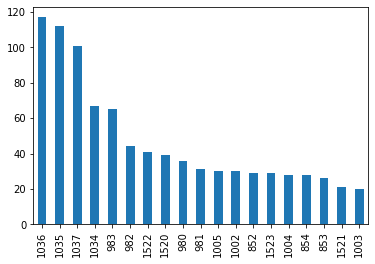

In [5]:
#Grafico de barras
df["LojaID"].value_counts(ascending=False).plot.bar()

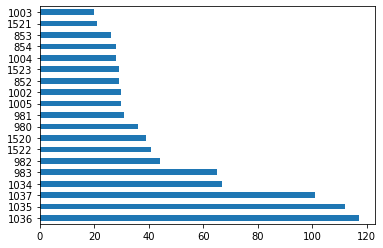

In [8]:
#Grafico de barras horizontais
df["LojaID"].value_counts().plot.barh()

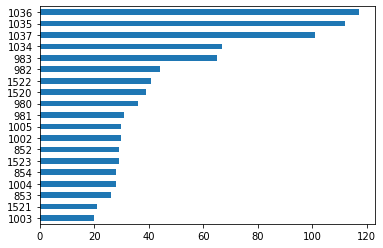

In [10]:
df["LojaID"].value_counts(ascending=True).plot.barh();

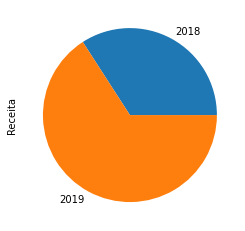

In [11]:
#Grafico de Pizza
df.groupby(df["Data"].dt.year)["Receita"].sum().plot.pie();

In [12]:
#Total vendas por cidade
df["Cidade"].value_counts()

Natal        240
Salvador     240
Fortaleza    142
Recife       142
Aracaju      130
Name: Cidade, dtype: int64

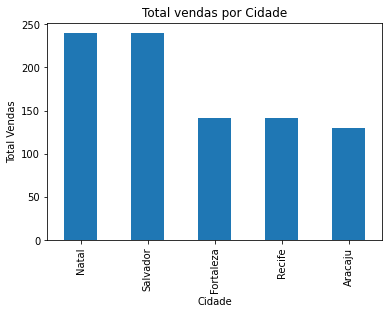

In [13]:
#Adicionando um titulo e alterando o nome dos eixos
import matplotlib.pyplot as plt
df["Cidade"].value_counts().plot.bar(title="Total vendas por Cidade")
plt.xlabel("Cidade")
plt.ylabel("Total Vendas");

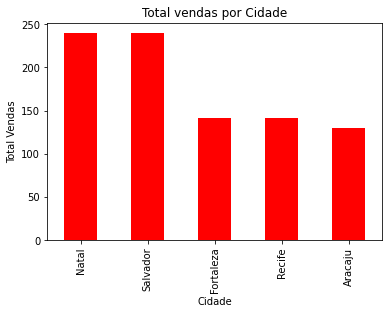

In [14]:
#Alterando a cor
df["Cidade"].value_counts().plot.bar(title="Total vendas por Cidade", color ="red")
plt.xlabel("Cidade")
plt.ylabel("Total Vendas");

In [15]:
#Alterando o estilo
plt.style.use("ggplot")

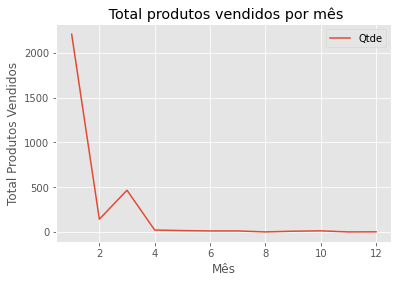

In [22]:
df.groupby(df["Mes_Venda"])["Qtde"].sum().plot(title = " Total produtos vendidos por mês")
plt.xlabel("Mês")
plt.ylabel("Total Produtos Vendidos");
plt.legend()

In [23]:
df.groupby(df["Mes_Venda"])["Qtde"].sum()

Mes_Venda
1     2208
2      144
3      467
4       23
5       17
6       13
7       13
8        2
9       10
10      14
11       2
12       3
Name: Qtde, dtype: int64

In [24]:
#Selecionando apenas as vendas de  2019
df_2019 = df[df["Ano_Venda"]== 2019]

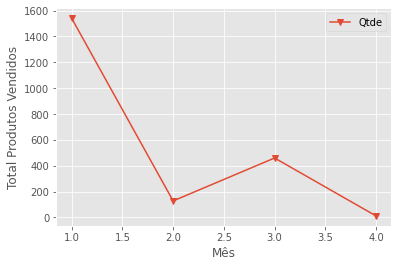

In [26]:
#Total de produtos vendidos por mês
df_2019.groupby(df_2019["Mes_Venda"])["Qtde"].sum().plot(marker = "v")
plt.xlabel("Mês")
plt.ylabel("Total Produtos Vendidos");
plt.legend();

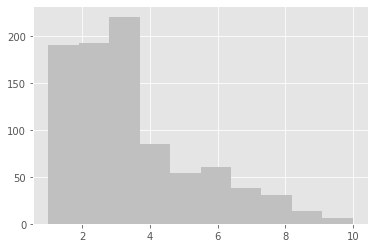

In [31]:
#Hitsograma
plt.hist(df["Qtde"], color= "silver");

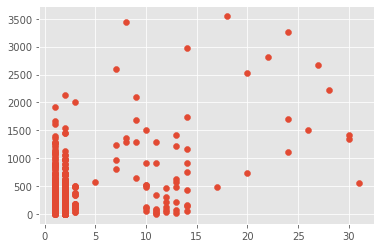

In [33]:
plt.scatter(x=df_2019["Dia_Venda"], y = df_2019["Receita"]);

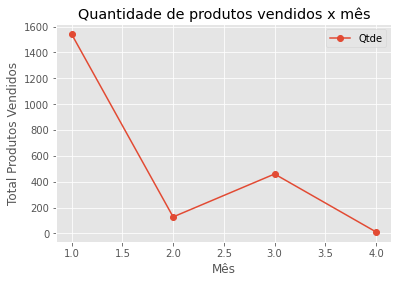

In [35]:
#Salvando em png
df_2019.groupby(df_2019["Mes_Venda"])["Qtde"].sum().plot(marker ="o")
plt.title("Quantidade de produtos vendidos x mês")
plt.xlabel("Mês")
plt.ylabel("Total Produtos Vendidos")
plt.legend()
plt.savefig("Grafico QTDE x MES.png")